In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split






In [ ]:
df= pd.read_csv('fifa_eda.csv')
df

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,565.0,Left,5.0,4.0,RF,2004,2021-01-01,5.583333,159.0,226500.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000.0,405.0,Right,5.0,5.0,ST,2018,2022-01-01,6.166667,183.0,127100.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500.0,290.0,Right,5.0,5.0,LW,2017,2022-01-01,5.750000,150.0,228100.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000.0,260.0,Right,4.0,1.0,GK,2011,2020-01-01,6.333333,168.0,138600.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000.0,355.0,Right,4.0,4.0,RCM,2015,2023-01-01,5.916667,154.0,196400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,J. Lundstram,19,England,47,65,Crewe Alexandra,60.0,1.0,Right,1.0,2.0,CM,2017,2019-01-01,5.750000,134.0,143.0
18203,243165,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,60.0,1.0,Right,1.0,2.0,ST,2018,2020-01-01,6.250000,170.0,113.0
18204,241638,B. Worman,16,England,47,67,Cambridge United,60.0,1.0,Right,1.0,2.0,ST,2017,2021-01-01,5.666667,148.0,165.0
18205,246268,D. Walker-Rice,17,England,47,66,Tranmere Rovers,60.0,1.0,Right,1.0,2.0,RW,2018,2019-01-01,5.833333,154.0,143.0


In [ ]:
#data exploration
#descriptive stat
df.describe()


,ID,Age,Overall,Potential,Value,Wage,International Reputation,Skill Moves,Joined,Height,Weight,Release Clause
count,18207.000000,18207.000000,18207.000000,18207.000000,17955.000000,18207.000000,18159.000000,18159.000000,18207.000000,18207.000000,18207.000000,18207.000000
mean,214298.338606,25.122206,66.238699,71.307299,2444.530214,9.731312,1.113222,2.361308,2016.420607,5.946771,165.979129,4585.060971
std,29965.244204,4.669943,6.908930,6.136496,5626.715434,21.999290,0.394031,0.756164,2.018194,0.220514,15.572775,10630.414430
min,16.000000,16.000000,46.000000,48.000000,10.000000,0.000000,1.000000,1.000000,1991.000000,5.083333,110.000000,13.000000
25%,200315.500000,21.000000,62.000000,67.000000,325.000000,1.000000,1.000000,2.000000,2016.000000,5.750000,154.000000,570.000000
50%,221759.000000,25.000000,66.000000,71.000000,700.000000,3.000000,1.000000,2.000000,2017.000000,5.916667,165.000000,1300.000000
75%,236529.500000,28.000000,71.000000,75.000000,2100.000000,9.000000,1.000000,3.000000,2018.000000,6.083333,176.000000,4585.060806
max,246620.000000,45.000000,94.000000,95.000000,118500.000000,565.000000,5.000000,5.000000,2018.000000,6.750000,243.000000,228100.000000


In [ ]:
# types of variables
#checking for missings
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Nationality               18207 non-null  object 
 4   Overall                   18207 non-null  int64  
 5   Potential                 18207 non-null  int64  
 6   Club                      17966 non-null  object 
 7   Value                     17955 non-null  float64
 8   Wage                      18207 non-null  float64
 9   Preferred Foot            18207 non-null  object 
 10  International Reputation  18159 non-null  float64
 11  Skill Moves               18159 non-null  float64
 12  Position                  18207 non-null  object 
 13  Joined                    18207 non-null  int64  
 14  Contra

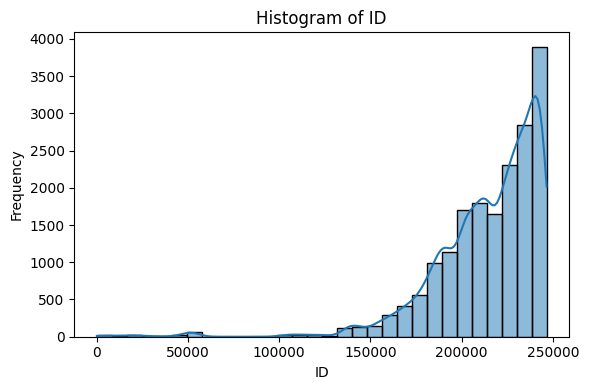

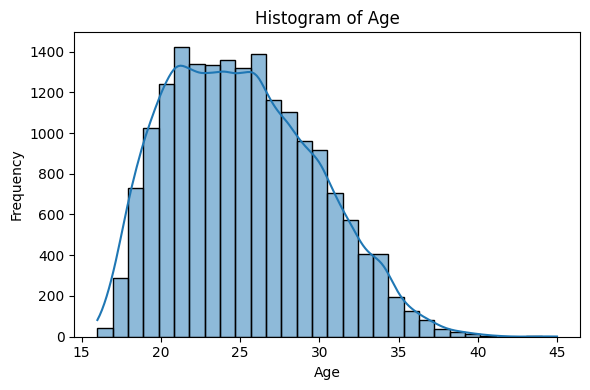

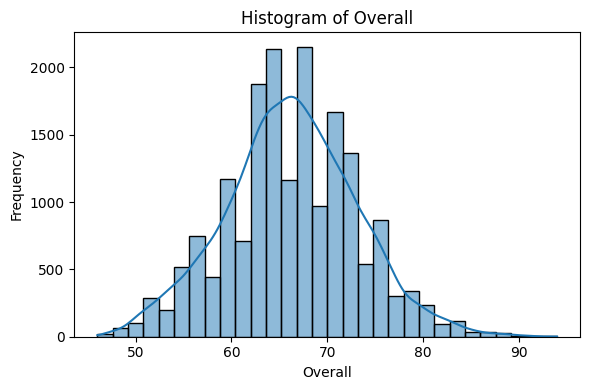

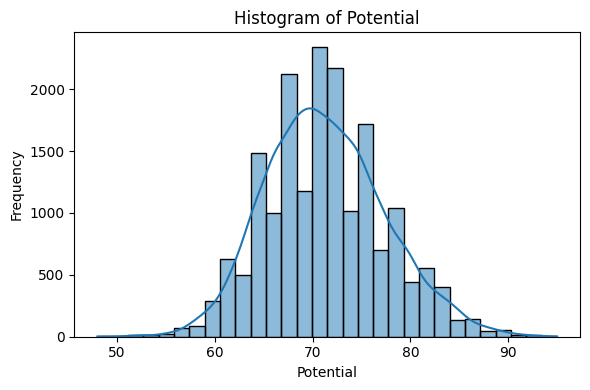

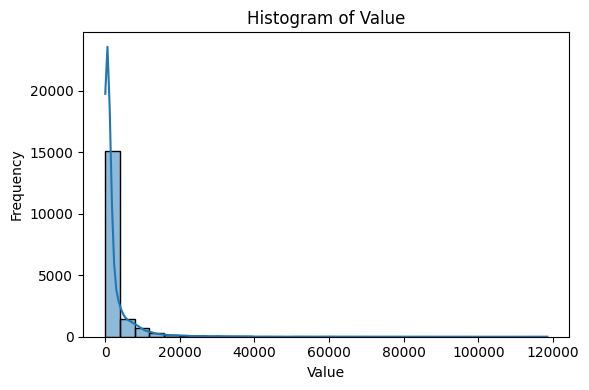

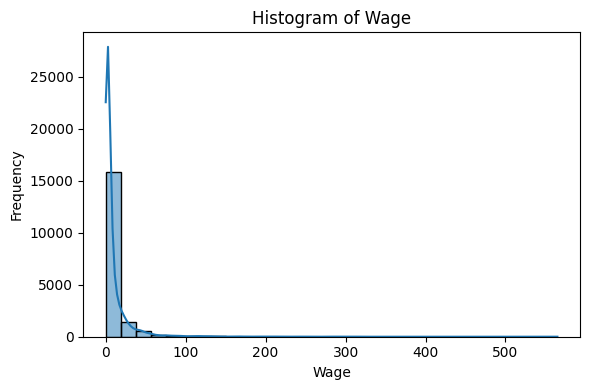

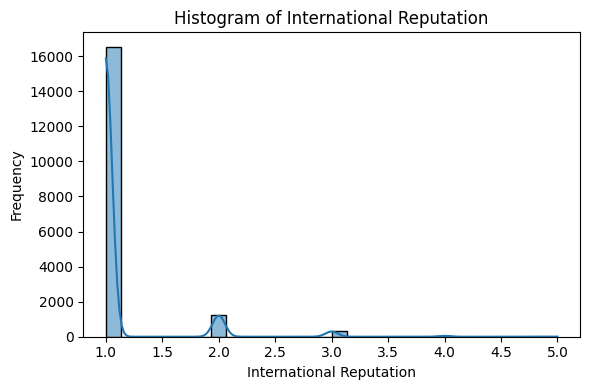

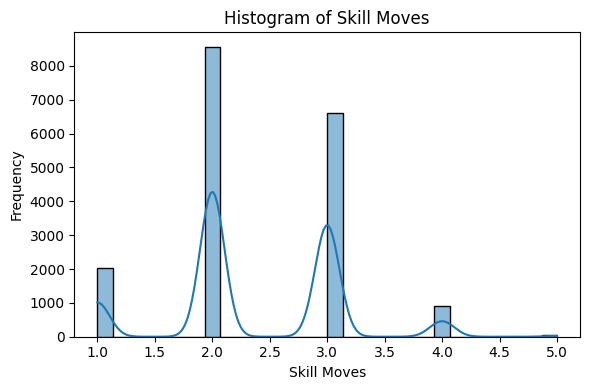

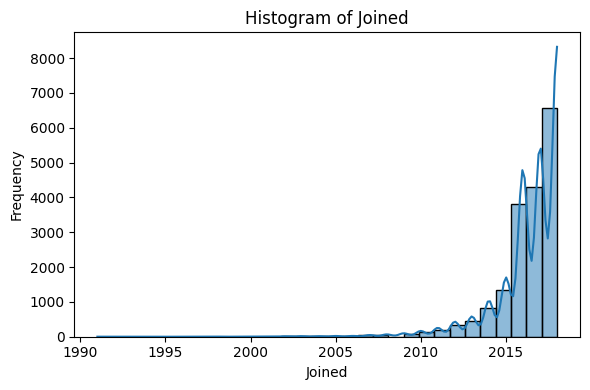

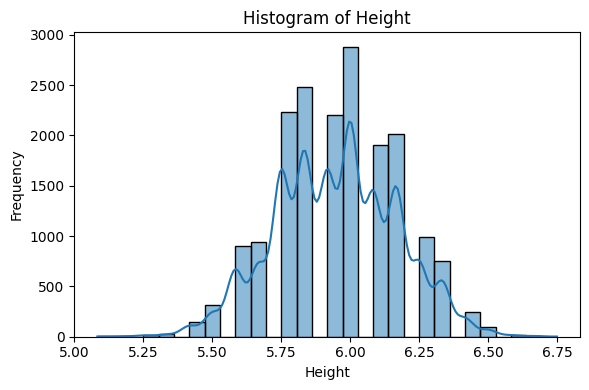

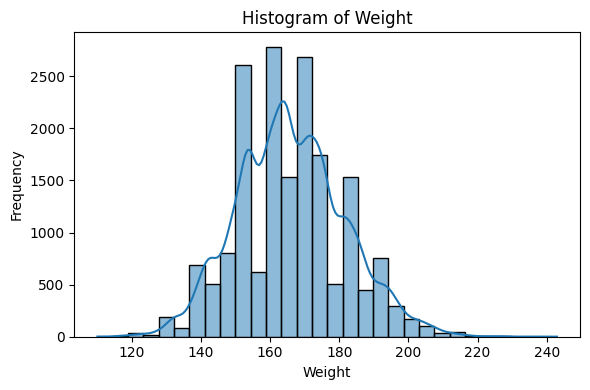

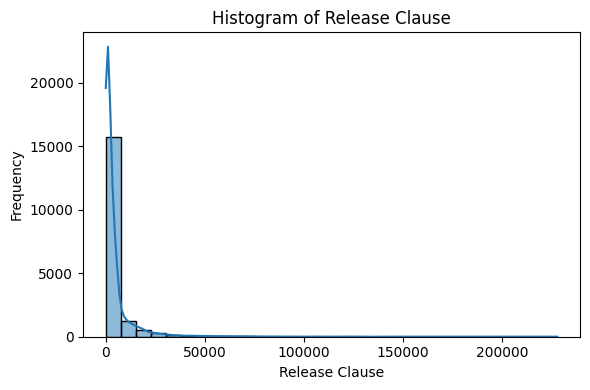

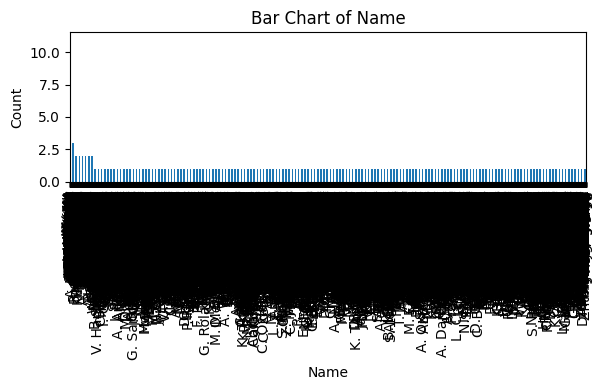

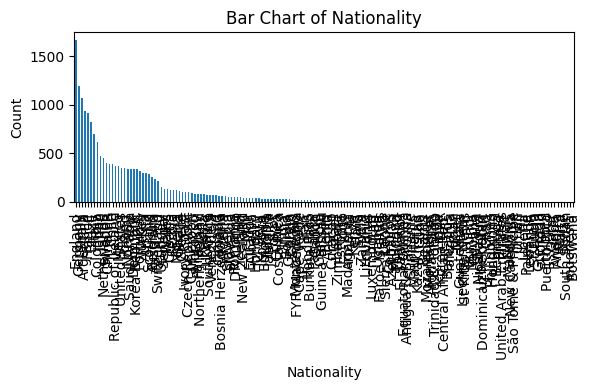

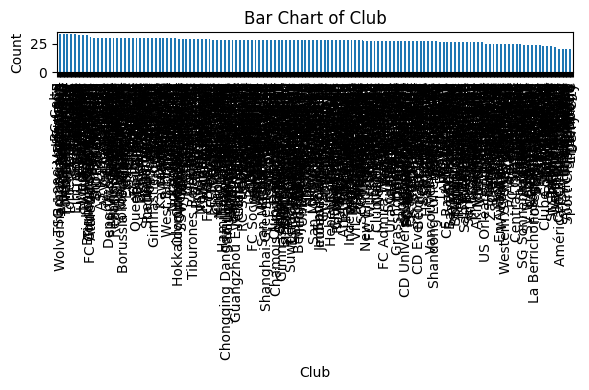

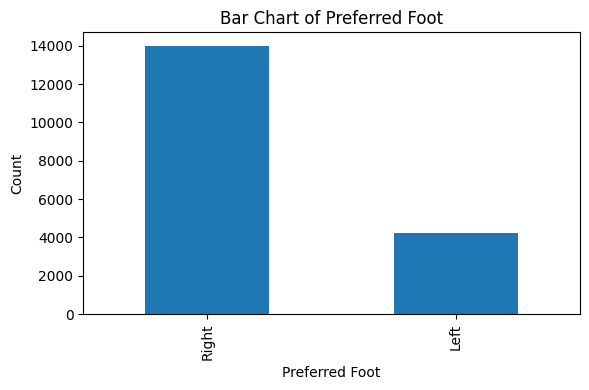

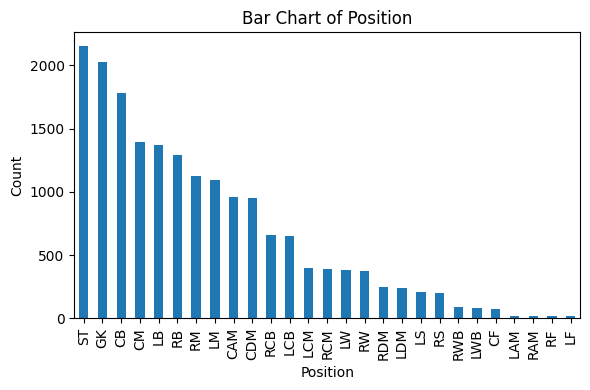

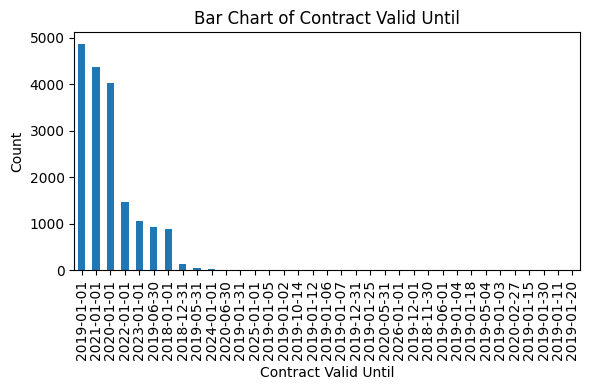

In [ ]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Plot histograms for numerical features
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col].dropna(), kde=True, bins=30)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

# Plot bar charts for categorical features
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Bar Chart of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

In [ ]:
# checking duplicates
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
18202,False
18203,False
18204,False
18205,False


In [ ]:
#data cleaning
# for missing values
numerical_cols = df.select_dtypes(include=['int64', 'float64'])
numerical_means = numerical_cols.mean()
df.fillna(numerical_means, inplace=True)
#for categorical data
categorical_cols = df.select_dtypes(include=['object'])
categorical_modes = categorical_cols.mode().iloc[0]
df.fillna(categorical_modes, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Nationality               18207 non-null  object 
 4   Overall                   18207 non-null  int64  
 5   Potential                 18207 non-null  int64  
 6   Club                      18207 non-null  object 
 7   Value                     18207 non-null  float64
 8   Wage                      18207 non-null  float64
 9   Preferred Foot            18207 non-null  object 
 10  International Reputation  18207 non-null  float64
 11  Skill Moves               18207 non-null  float64
 12  Position                  18207 non-null  object 
 13  Joined                    18207 non-null  int64  
 14  Contra

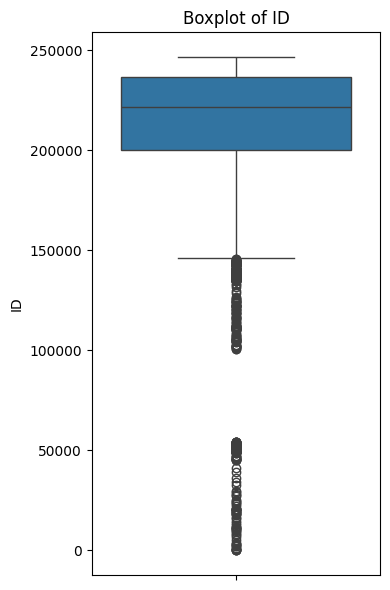

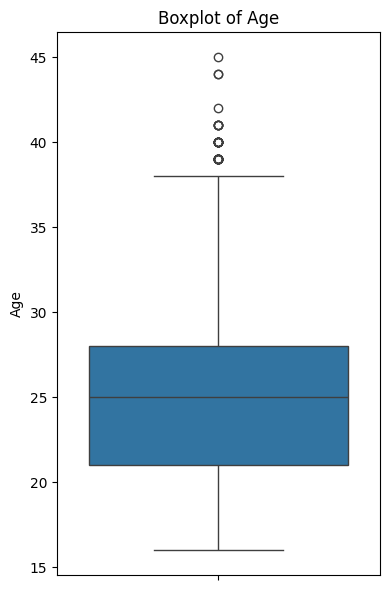

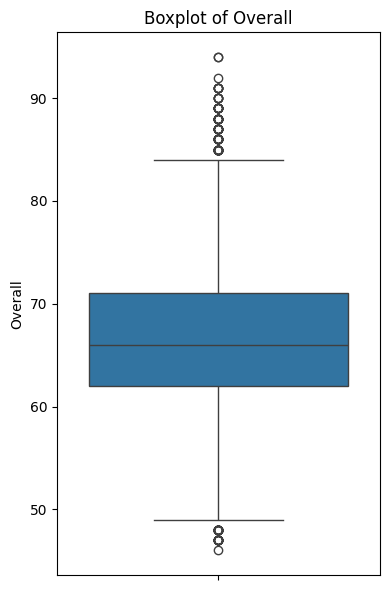

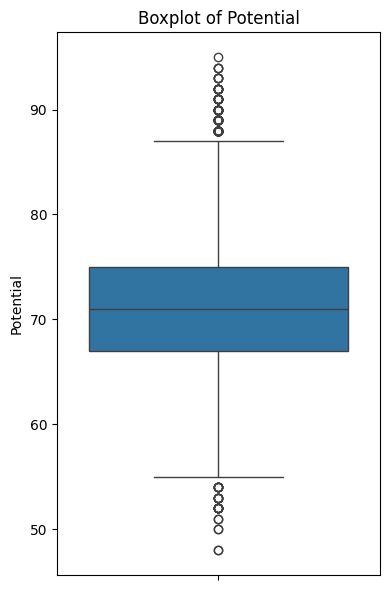

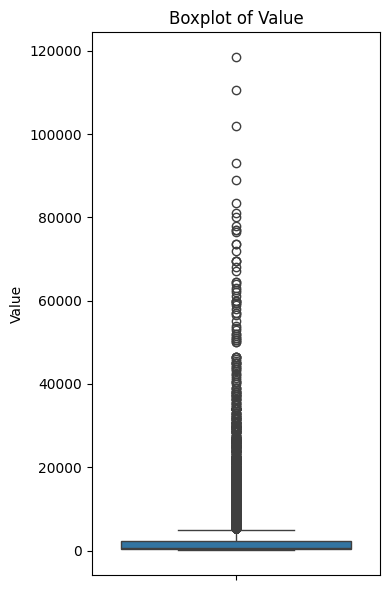

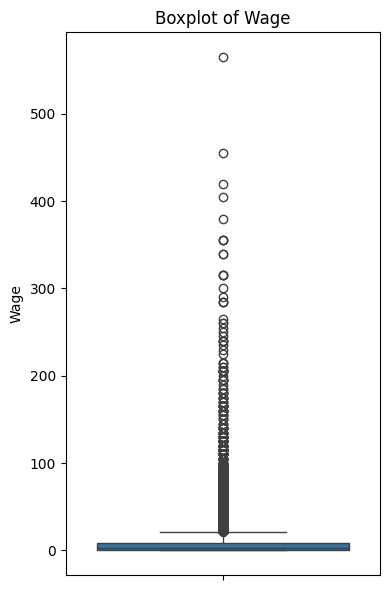

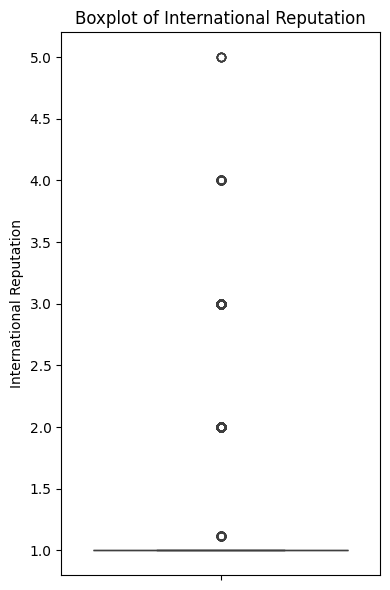

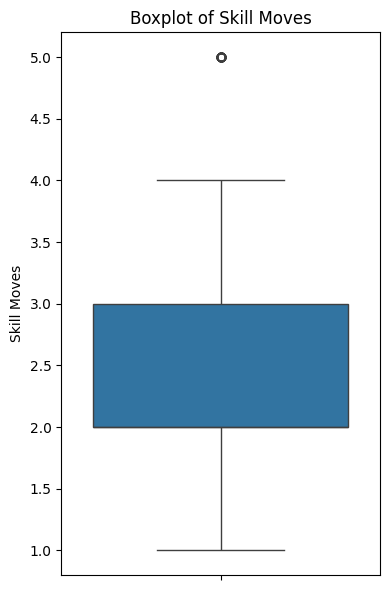

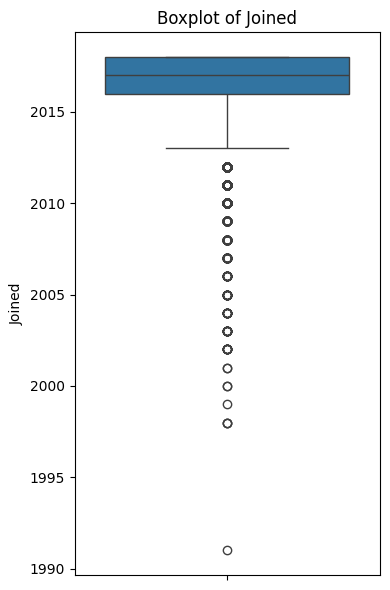

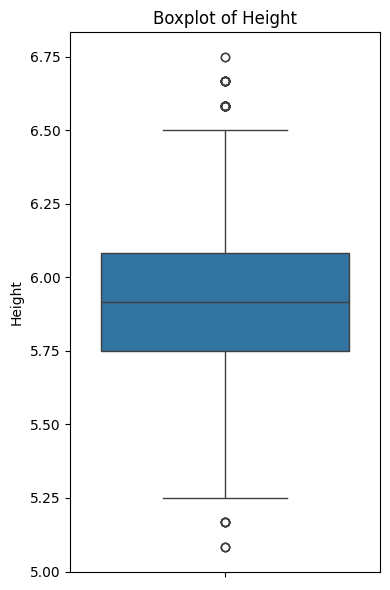

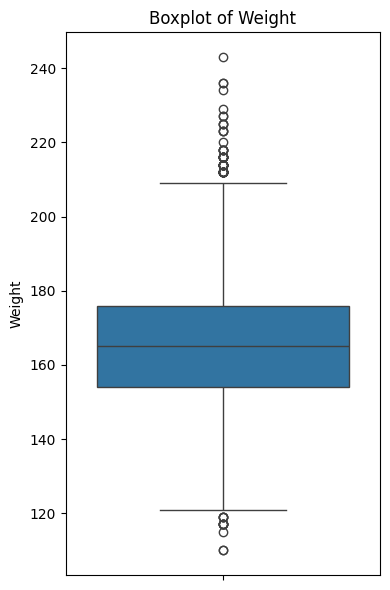

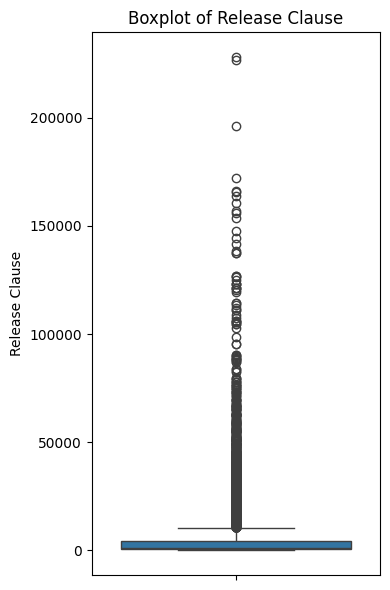

In [ ]:
#outliers
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    plt.figure(figsize=(4, 6))
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

In [ ]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
def remove_outliers_iqr(data, cols):
    for col in cols:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    return data
new_df = remove_outliers_iqr(df, numerical_cols)
print(f"Original shape: {df.shape}")
print(f"After removing outliers: {new_df.shape}")

Original shape: (18207, 18)
After removing outliers: (11463, 18)


In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11463 entries, 992 to 18153
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        11463 non-null  int64  
 1   Name                      11463 non-null  object 
 2   Age                       11463 non-null  int64  
 3   Nationality               11463 non-null  object 
 4   Overall                   11463 non-null  int64  
 5   Potential                 11463 non-null  int64  
 6   Club                      11463 non-null  object 
 7   Value                     11463 non-null  float64
 8   Wage                      11463 non-null  float64
 9   Preferred Foot            11463 non-null  object 
 10  International Reputation  11463 non-null  float64
 11  Skill Moves               11463 non-null  float64
 12  Position                  11463 non-null  object 
 13  Joined                    11463 non-null  int64  
 14  Contract 

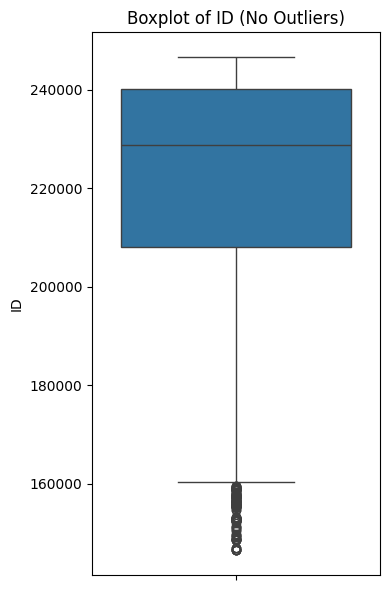

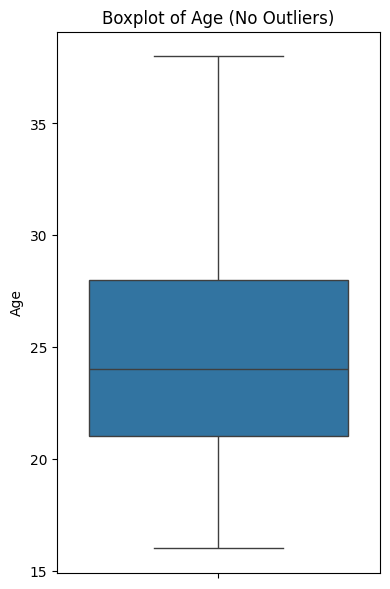

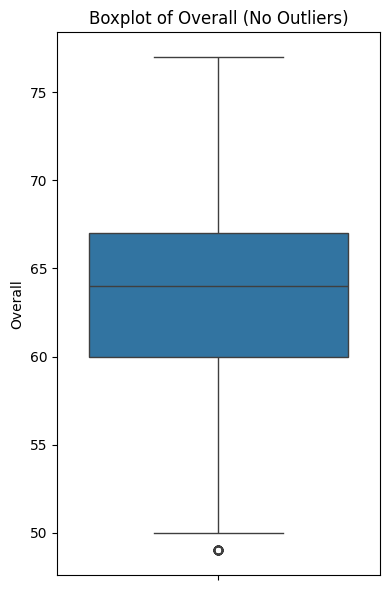

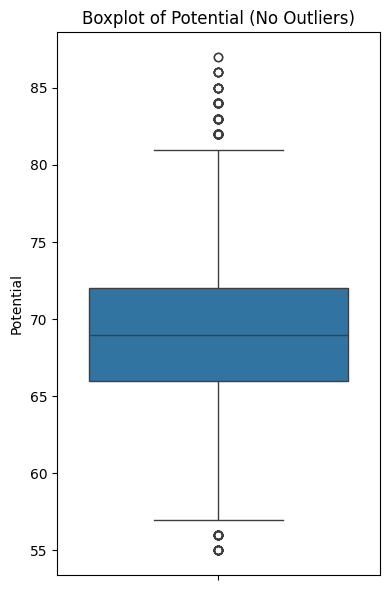

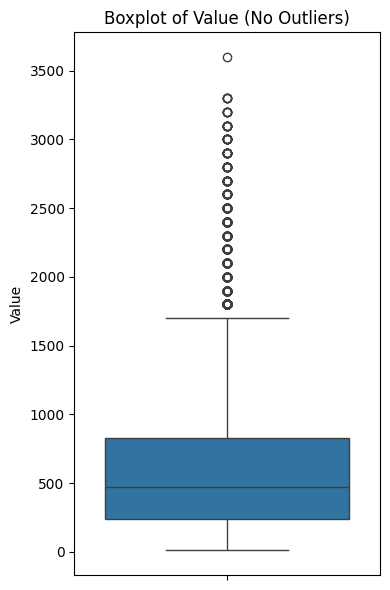

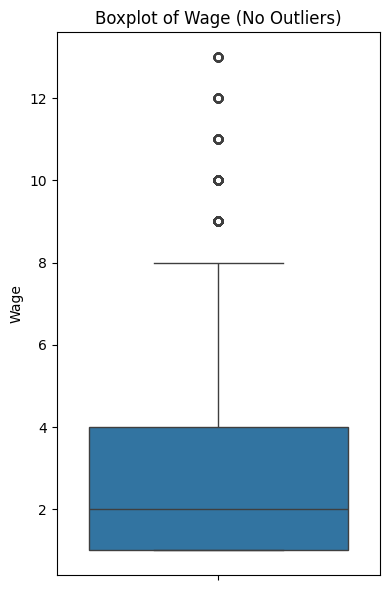

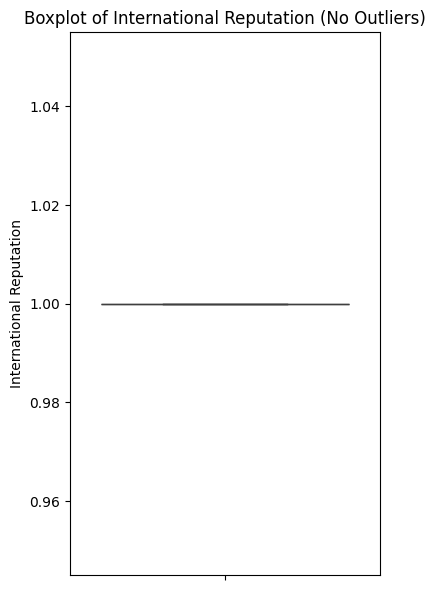

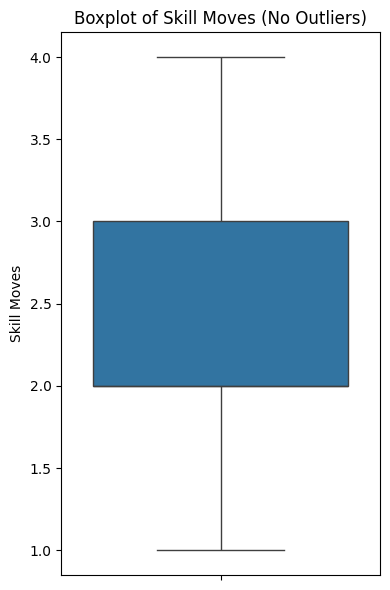

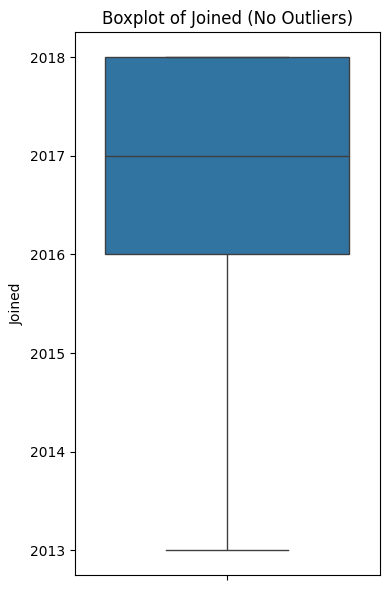

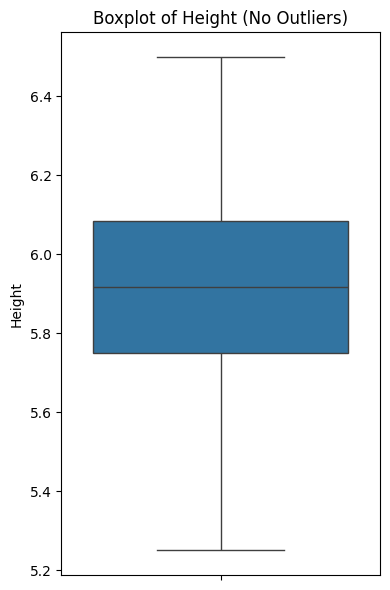

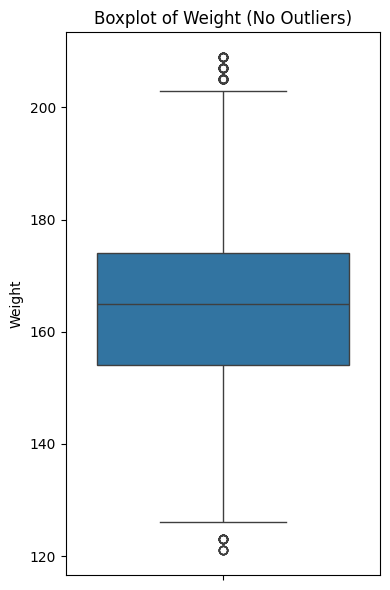

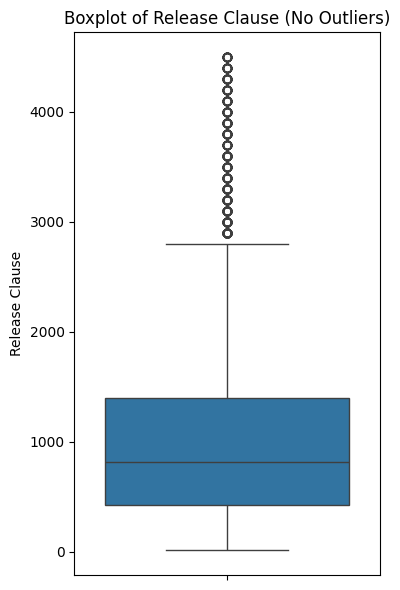

In [ ]:
for col in numerical_cols:
    plt.figure(figsize=(4, 6))
    sns.boxplot(y=new_df[col])
    plt.title(f'Boxplot of {col} (No Outliers)')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

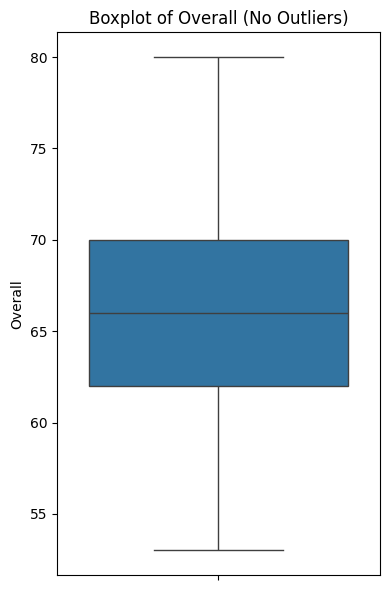

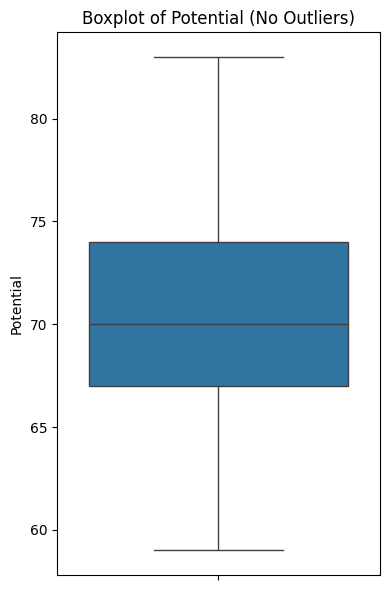

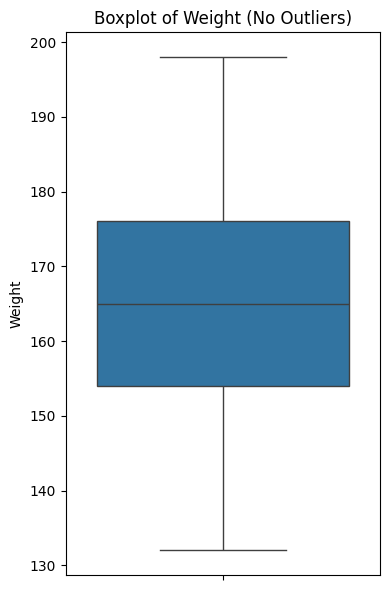

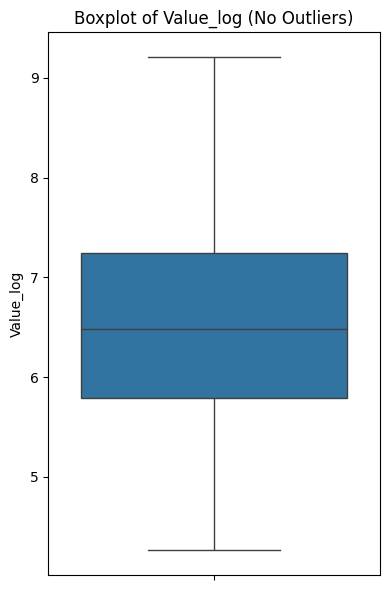

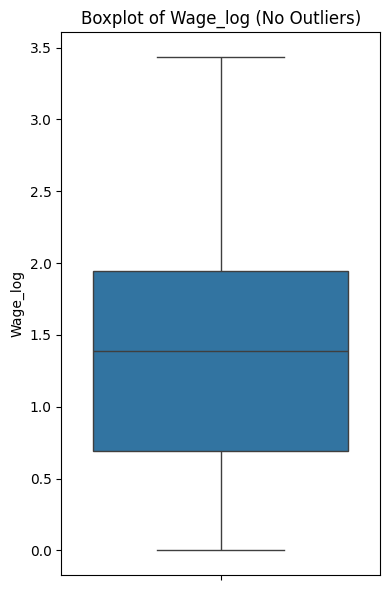

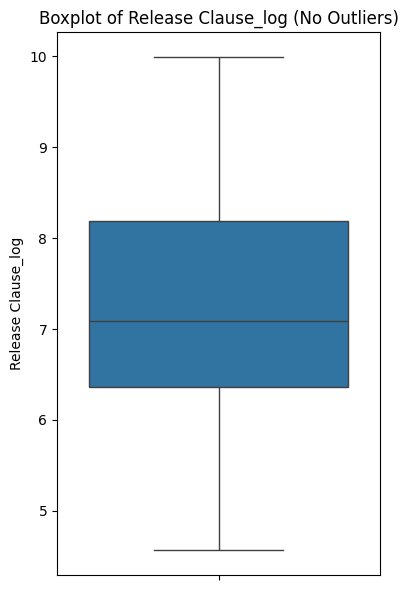

In [ ]:
def convert_currency_to_float(col):
    col = col.astype(str)
    col = col.str.replace('€', '', regex=False)
    col = col.str.replace('K', 'e3', regex=False)
    col = col.str.replace('M', 'e6', regex=False)
    return pd.to_numeric(col, errors='coerce')

df['Value'] = convert_currency_to_float(df['Value'])
df['Wage'] = convert_currency_to_float(df['Wage'])
df['Release Clause'] = convert_currency_to_float(df['Release Clause'])

df['Weight'] = df['Weight'].astype(str).str.replace('lbs', '', regex=False)
df['Weight'] = pd.to_numeric(df['Weight'], errors='coerce')

df['Overall'] = pd.to_numeric(df['Overall'], errors='coerce')
df['Potential'] = pd.to_numeric(df['Potential'], errors='coerce')

for col in ['Value', 'Wage', 'Release Clause']:
    df[col + '_log'] = np.log1p(df[col])
columns_to_clean = ['Overall', 'Potential', 'Weight', 'Value_log', 'Wage_log', 'Release Clause_log']

def remove_outliers_iqr(data, cols, multiplier=1.0):
    for col in cols:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier * IQR
        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    return data

new_df = remove_outliers_iqr(df, columns_to_clean, multiplier=1.0)
for col in columns_to_clean:
    plt.figure(figsize=(4, 6))
    sns.boxplot(y=new_df[col])
    plt.title(f'Boxplot of {col} (No Outliers)')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

In [ ]:
new_df.info()
new_df.duplicated()

<class 'pandas.core.frame.DataFrame'>
Index: 15406 entries, 439 to 17729
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        15406 non-null  int64  
 1   Name                      15406 non-null  object 
 2   Age                       15406 non-null  int64  
 3   Nationality               15406 non-null  object 
 4   Overall                   15406 non-null  int64  
 5   Potential                 15406 non-null  int64  
 6   Club                      15406 non-null  object 
 7   Value                     15406 non-null  float64
 8   Wage                      15406 non-null  float64
 9   Preferred Foot            15406 non-null  object 
 10  International Reputation  15406 non-null  float64
 11  Skill Moves               15406 non-null  float64
 12  Position                  15406 non-null  object 
 13  Joined                    15406 non-null  int64  
 14  Contract 

,0
439,False
519,False
524,False
527,False
538,False
...,...
17723,False
17725,False
17727,False
17728,False


In [ ]:
new_df.describe()


,ID,Age,Overall,Potential,Value,Wage,International Reputation,Skill Moves,Joined,Height,Weight,Release Clause,Value_log,Wage_log,Release Clause_log
count,15406.000000,15406.000000,15406.00000,15406.000000,15406.000000,15406.000000,15406.000000,15406.000000,15406.000000,15406.000000,15406.000000,15406.000000,15406.000000,15406.000000,15406.000000
mean,215423.302674,25.109243,65.60418,70.643645,1339.227578,5.290406,1.046763,2.331062,2016.472608,5.940463,165.290925,2565.351083,6.581921,1.500155,7.216216
std,28674.129938,4.564665,5.46345,5.045278,1756.355709,6.033944,0.224140,0.698249,1.941667,0.212658,14.170426,3289.193327,1.090153,0.780483,1.131765
min,16.000000,16.000000,53.00000,59.000000,70.000000,0.000000,1.000000,1.000000,1991.000000,5.166667,132.000000,95.000000,4.262680,0.000000,4.564348
25%,202014.750000,21.000000,62.00000,67.000000,325.000000,1.000000,1.000000,2.000000,2016.000000,5.750000,154.000000,581.000000,5.786897,0.693147,6.366470
50%,222637.500000,25.000000,66.00000,70.000000,650.000000,3.000000,1.000000,2.000000,2017.000000,5.916667,165.000000,1200.000000,6.478510,1.386294,7.090910
75%,236581.250000,28.000000,70.00000,74.000000,1400.000000,6.000000,1.000000,3.000000,2018.000000,6.083333,176.000000,3600.000000,7.244942,1.945910,8.188967
max,246617.000000,45.000000,80.00000,83.000000,10000.000000,30.000000,4.000000,5.000000,2018.000000,6.666667,198.000000,21900.000000,9.210440,3.433987,9.994288


In [ ]:
df.describe()

,ID,Age,Overall,Potential,Value,Wage,International Reputation,Skill Moves,Joined,Height,Weight,Release Clause,Value_log,Wage_log,Release Clause_log
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000
mean,214298.338606,25.122206,66.238699,71.307299,2444.530214,9.731312,1.113222,2.361308,2016.420607,5.946771,165.979129,4585.060971,6.730473,1.678575,7.358259
std,29965.244204,4.669943,6.908930,6.136496,5587.638395,21.999290,0.393511,0.755167,2.018194,0.220514,15.572775,10630.414430,1.399096,1.019503,1.419618
min,16.000000,16.000000,46.000000,48.000000,10.000000,0.000000,1.000000,1.000000,1991.000000,5.083333,110.000000,13.000000,2.397895,0.000000,2.639057
25%,200315.500000,21.000000,62.000000,67.000000,325.000000,1.000000,1.000000,2.000000,2016.000000,5.750000,154.000000,570.000000,5.786897,0.693147,6.347389
50%,221759.000000,25.000000,66.000000,71.000000,700.000000,3.000000,1.000000,2.000000,2017.000000,5.916667,165.000000,1300.000000,6.552508,1.386294,7.170888
75%,236529.500000,28.000000,71.000000,75.000000,2200.000000,9.000000,1.000000,3.000000,2018.000000,6.083333,176.000000,4585.060806,7.696667,2.302585,8.430777
max,246620.000000,45.000000,94.000000,95.000000,118500.000000,565.000000,5.000000,5.000000,2018.000000,6.750000,243.000000,228100.000000,11.682677,6.338594,12.337544


                                ID       Age   Overall  Potential     Value  \
ID                        1.000000 -0.729703 -0.426506   0.146363 -0.135698   
Age                      -0.729703  1.000000  0.514261  -0.351889  0.130610   
Overall                  -0.426506  0.514261  1.000000   0.496167  0.733857   
Potential                 0.146363 -0.351889  0.496167   1.000000  0.570213   
Value                    -0.135698  0.130610  0.733857   0.570213  1.000000   
Wage                     -0.252954  0.247062  0.651578   0.417683  0.674747   
International Reputation -0.365142  0.279122  0.298041   0.128932  0.282335   
Skill Moves              -0.055483  0.049487  0.354488   0.247694  0.333381   
Joined                    0.174292 -0.170259 -0.125059   0.001270 -0.046340   
Height                   -0.066025  0.051360  0.019951  -0.013953 -0.017689   
Weight                   -0.162205  0.202140  0.146163  -0.030160  0.046772   
Release Clause           -0.094382  0.072112  0.6711

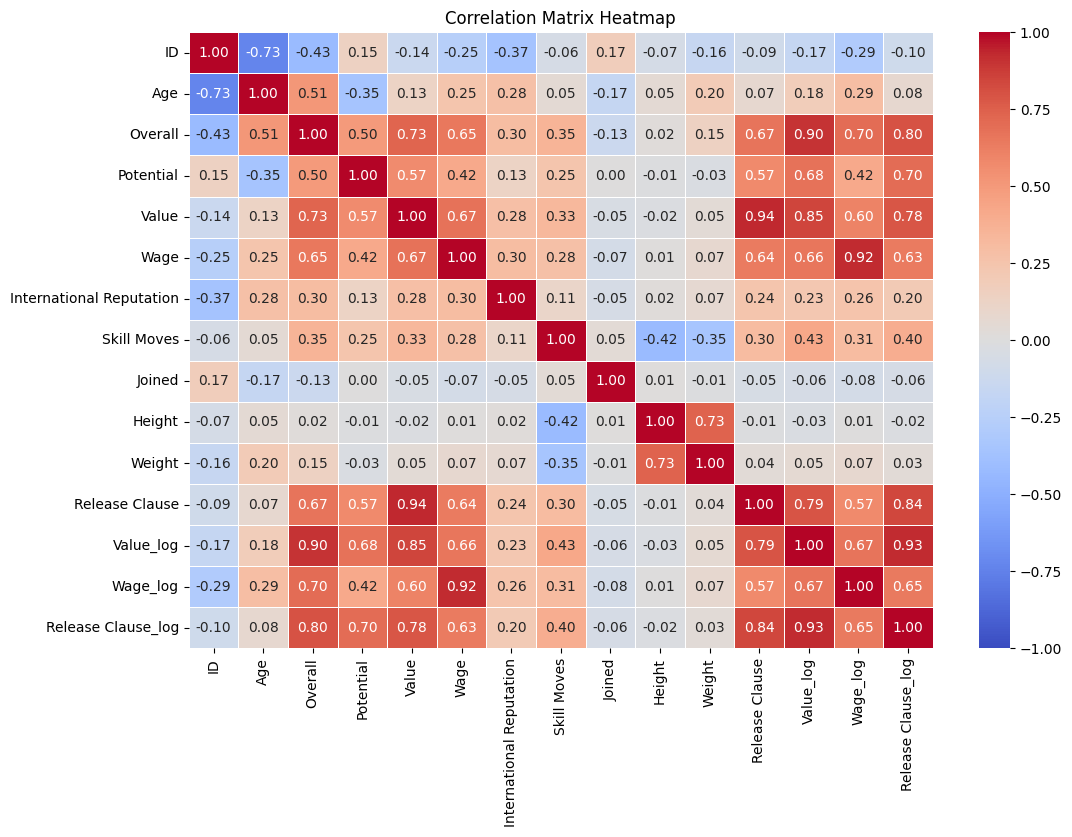

In [ ]:
numerical_cols_new_df = new_df.select_dtypes(include=np.number).columns
corr_matrix = new_df[numerical_cols_new_df].corr()
print(corr_matrix)
plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    vmin=-1,
    vmax=1,
    linewidths=0.5,
)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [ ]:
#How does a player’s Overall rating affect their Wage after controlling for Age and International Reputation?
#Is Skill Moves a significant predictor of Release Clause_log after accounting for Overall?
#Can we drop Release Clause without losing information if Value is already in the model?

In [ ]:
#second question
new_df['Overall_centered'] = new_df['Overall'] - new_df['Overall'].mean()
new_df['Skill_Moves_centered'] = new_df['Skill Moves'] - new_df['Skill Moves'].mean()
X3 = sm.add_constant(new_df[['Overall_centered', 'Skill_Moves_centered']])
y3 = new_df['Release Clause_log']
model3 = sm.OLS(y3, X3).fit(cov_type='HC3')
print("="*80)
print("IMPROVED MODEL WITH CENTERED PREDICTORS & ROBUST SE".center(80))
print("="*80)
print(model3.summary())
vif_data = pd.DataFrame()
vif_data["Variable"] = X3.columns
vif_data["VIF"] = [variance_inflation_factor(X3.values, i) for i in range(X3.shape[1])]
print("\nVIF:\n", vif_data)
residuals = model3.resid
bp_test = het_breuschpagan(residuals, model3.model.exog)
print("\nBreusch-Pagan test (HC3 already accounts for this):")
print(dict(zip(['LM Stat', 'LM p-val', 'F Stat', 'F p-val'], bp_test)))

print("\nKEY INTERPRETATIONS:")
print(f"+1 Overall → {100*(np.exp(model3.params['Overall_centered'])-1):.1f}% higher release clause")
print(f"+1 Skill Move → {100*(np.exp(model3.params['Skill_Moves_centered'])-1):.1f}% higher clause")

              IMPROVED MODEL WITH CENTERED PREDICTORS & ROBUST SE               
                            OLS Regression Results                            
Dep. Variable:     Release Clause_log   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                 1.563e+04
Date:                Mon, 26 May 2025   Prob (F-statistic):               0.00
Time:                        07:41:18   Log-Likelihood:                -15420.
No. Observations:               15406   AIC:                         3.085e+04
Df Residuals:                   15403   BIC:                         3.087e+04
Df Model:                           2                                         
Covariance Type:                  HC3                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------

In [ ]:
#third question
from scipy import stats
new_df['Value_log_centered'] = new_df['Value_log'] - new_df['Value_log'].mean()
new_df['Overall_centered'] = new_df['Overall'] - new_df['Overall'].mean()
X4 = sm.add_constant(new_df[['Value_log_centered', 'Overall_centered']])
y4 = new_df['Release Clause_log']
model4 = sm.OLS(y4, X4).fit(cov_type='HC3')
print("="*80)
print("IMPROVED MODEL WITH CENTERED PREDICTORS & ROBUST SE".center(80))
print("="*80)
print(model4.summary())
vif_data = pd.DataFrame()
vif_data["Variable"] = X4.columns
vif_data["VIF"] = [variance_inflation_factor(X4.values, i) for i in range(X4.shape[1])]
print("\nVIF:\n", vif_data)
residuals = model4.resid
print("\nResidual Skewness: {:.3f}, Kurtosis: {:.3f}".format(
    stats.skew(residuals), stats.kurtosis(residuals)))
print("\nKEY INTERPRETATIONS:")
print("+1 in log(Value) → {:.1f}% higher release clause".format(
    100*(np.exp(model4.params['Value_log_centered']) - 1)))
print("+1 Overall → {:.1f}% change in release clause".format(
    100*(np.exp(model4.params['Overall_centered']) - 1)))

              IMPROVED MODEL WITH CENTERED PREDICTORS & ROBUST SE               
                            OLS Regression Results                            
Dep. Variable:     Release Clause_log   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                 5.279e+04
Date:                Mon, 26 May 2025   Prob (F-statistic):               0.00
Time:                        07:41:18   Log-Likelihood:                -8117.8
No. Observations:               15406   AIC:                         1.624e+04
Df Residuals:                   15403   BIC:                         1.626e+04
Df Model:                           2                                         
Covariance Type:                  HC3                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------

In [ ]:
#first
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

# Assuming new_df has columns: 'Wage', 'Overall', 'Age', 'International Reputation'

# Log-transform Wage (target variable)
# Added a check for zeros before log to avoid -inf, using log1p is safer
new_df['log_Wage'] = np.log1p(new_df['Wage'])

# Define predictors and add constant
X = new_df[['Overall', 'Age', 'International Reputation']]
X = sm.add_constant(X)  #  intercept (β₀)

# OLS model
model = sm.OLS(new_df['log_Wage'], X).fit()

robust_results = model.get_robustcov_results(cov_type='HC3')
print("\nMODEL SUMMARY (Robust SE):\n")
print(robust_results.summary())
# Check multicollinearity
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVIF Scores:\n", vif_data)


MODEL SUMMARY (Robust SE):

                            OLS Regression Results                            
Dep. Variable:               log_Wage   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                     4147.
Date:                Mon, 26 May 2025   Prob (F-statistic):               0.00
Time:                        09:15:19   Log-Likelihood:                -12717.
No. Observations:               15406   AIC:                         2.544e+04
Df Residuals:                   15402   BIC:                         2.547e+04
Df Model:                           3                                         
Covariance Type:                  HC3                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------